In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter('ignore')
from sklearn.ensemble import RandomForestRegressor
from sklearn.externals import joblib

In [3]:
tweets =  pd.read_csv('F:\CS_599\social-swear-master\social-swear-master\processed_tweets_santiago.csv')

In [4]:
tweets.columns

Index(['user_id', 'text', 'n_retweets', 'n_favorites', 'n_user_followers',
       'n_user_following', 'n_user_posts', 'numMentions', 'engagment',
       'is_reply', 'is_user_bot', 'is_valid', 'text_polarity',
       'text_subjectivity', 'vader_comp', 'vader_pos', 'vader_neu',
       'vader_neg', 'swear_count', 'swear_present', 'text_len', 'n_mentions',
       'n_hashtags', 'n_links', 'n_emojis'],
      dtype='object')

In [5]:
not_pop = tweets.loc[(tweets['n_user_followers']<=200) &(tweets['n_user_followers']>=100) ]

In [6]:
len(not_pop)

506153

In [7]:
used_cols = [
    'n_user_followers', 'n_user_following', 'n_user_posts', 'numMentions','is_reply',
     'text_polarity', 'text_subjectivity', 'vader_comp', 'vader_pos', 'vader_neu', 'vader_neg',
    'swear_count', 'swear_present', 'text_len', 'n_mentions', 'n_hashtags', 'n_links', 'n_emojis'
]

In [8]:
X = not_pop.dropna()[used_cols].values
y = not_pop.dropna().engagment.values
rf_not_pop = RandomForestRegressor()

In [9]:
%time rf_not_pop.fit(X, y)

Wall time: 33.7 s


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [11]:
importances = pd.Series(index=used_cols, data=rf_not_pop.feature_importances_)
importances.sort_values(inplace=True)

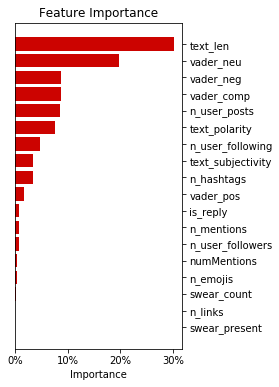

In [12]:
plt.figure(figsize=(3, 6))
plt.barh(importances.index, importances, color='#CC0300')

plt.gca().yaxis.tick_right()
plt.gca().set_xticklabels(['{:.0%}'.format(v) for v in plt.gca().get_xticks()])
plt.xlabel('Importance')

plt.title('Feature Importance')
plt.show()

In [13]:
rf_not_pop.score(X, y, sample_weight=None)

0.6326271003692656

In [14]:
popular = tweets.loc[(tweets['n_user_followers']>=10000) ]

In [19]:
len(popular)

165185

In [24]:
X = popular.dropna()[used_cols].values
y = popular.dropna().engagment.values
rf_popular = RandomForestRegressor()

In [25]:
%time rf_popular.fit(X, y)

Wall time: 9.85 s


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [26]:
importances = pd.Series(index=used_cols, data=rf_popular.feature_importances_)
importances.sort_values(inplace=True)

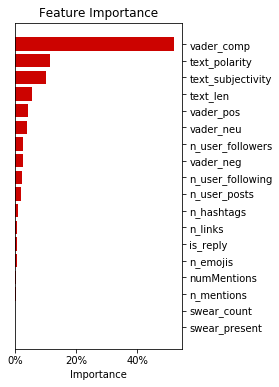

In [27]:
plt.figure(figsize=(3, 6))
plt.barh(importances.index, importances, color='#CC0300')

plt.gca().yaxis.tick_right()
plt.gca().set_xticklabels(['{:.0%}'.format(v) for v in plt.gca().get_xticks()])
plt.xlabel('Importance')

plt.title('Feature Importance')
plt.show()

In [28]:
rf_popular.score(X, y, sample_weight=None)

0.7578397430729031

In [37]:
local_popular = tweets.loc[(tweets['n_user_followers']<=10000) &(tweets['n_user_followers']>=2000) ]

In [38]:
len(local_popular)

614263

In [39]:
X = local_popular.dropna()[used_cols].values
y = local_popular.dropna().engagment.values
rf_local_popular = RandomForestRegressor()

In [40]:
%time rf_local_popular.fit(X, y)

Wall time: 44 s


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [41]:
importances = pd.Series(index=used_cols, data=rf_local_popular.feature_importances_)
importances.sort_values(inplace=True)

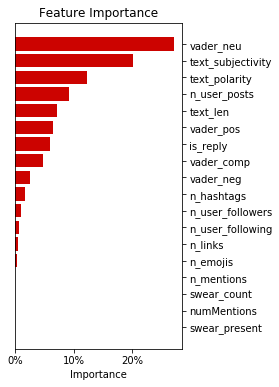

In [42]:
plt.figure(figsize=(3, 6))
plt.barh(importances.index, importances, color='#CC0300')

plt.gca().yaxis.tick_right()
plt.gca().set_xticklabels(['{:.0%}'.format(v) for v in plt.gca().get_xticks()])
plt.xlabel('Importance')

plt.title('Feature Importance')
plt.show()

In [43]:
rf_local_popular.score(X, y, sample_weight=None)

0.7144816942569563

In [54]:
reg_user = tweets.loc[(tweets['n_user_followers']<=500) &(tweets['n_user_followers']>=200) ]

In [55]:
len(reg_user)

1095185

In [56]:
X = reg_user.dropna()[used_cols].values
y = reg_user.dropna().engagment.values
rf_reg_user = RandomForestRegressor()

In [57]:
%time rf_reg_user.fit(X, y)

Wall time: 1min 36s


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [58]:
importances = pd.Series(index=used_cols, data=rf_reg_user.feature_importances_)
importances.sort_values(inplace=True)

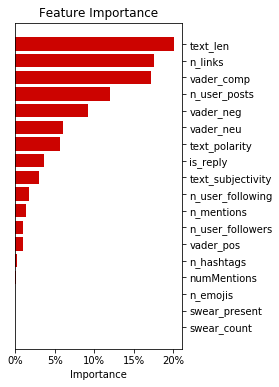

In [59]:
plt.figure(figsize=(3, 6))
plt.barh(importances.index, importances, color='#CC0300')

plt.gca().yaxis.tick_right()
plt.gca().set_xticklabels(['{:.0%}'.format(v) for v in plt.gca().get_xticks()])
plt.xlabel('Importance')

plt.title('Feature Importance')
plt.show()

In [60]:
rf_reg_user.score(X, y, sample_weight=None)

0.29396020879828766